## Initial Setup

In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime

### Load datasets into pandas dataframe

In [51]:
customers_df = pd.read_csv("/Users/dev/python1_cogitate/data/customers_sample.csv")
policies_df = pd.read_csv("/Users/dev/python1_cogitate/data/policies_sample.csv")
claims_df = pd.read_csv("/Users/dev/python1_cogitate/data/claims_sample.csv")
fraud_df = pd.read_csv("/Users/dev/python1_cogitate/data/fraud_detection_sample.csv")

customers_df.shape, policies_df.shape, claims_df.shape, fraud_df.shape

((50, 6), (75, 8), (120, 7), (40, 6))

In [52]:
customers_df.head()

,customer_id,name,age,email,city,registration_date
0,1,Kenneth Davis,56,customer1@email.com,New York,2023-12-30
1,2,Deborah Moore,46,customer2@email.com,Los Angeles,2023-07-18
2,3,Joseph Rodriguez,60,customer3@email.com,Philadelphia,2022-12-31
3,4,Michael Baker,38,customer4@email.com,Philadelphia,2020-05-01
4,5,Paul Garcia,36,customer5@email.com,Phoenix,2023-05-23


In [53]:
policies_df.head()

,policy_id,customer_id,policy_number,policy_type,annual_premium,coverage_amount,start_date,status
0,201,29,P1001,HOME,1153.05,10385.62,2022-06-05,EXPIRED
1,202,44,P1002,HEALTH,2840.23,31689.58,2022-08-16,EXPIRED
2,203,35,P1003,BUSINESS,7113.81,64808.93,2021-08-19,ACTIVE
3,204,28,P1004,AUTO,1330.08,41918.31,2023-07-19,ACTIVE
4,205,23,P1005,HEALTH,4083.91,109910.68,2022-11-15,ACTIVE


In [54]:
claims_df.head()

,claim_id,policy_id,policy_number,claim_date,claim_amount,claim_type,status
0,101,244,P1044,2025-02-22,9644.43,MEDICAL,PENDING
1,102,203,P1003,2022-10-18,7061.45,FIRE,PENDING
2,103,271,P1071,2022-11-21,17933.97,ACCIDENT,PENDING
3,104,230,P1030,2025-05-19,8072.04,OTHER,APPROVED
4,105,229,P1029,2022-02-20,40902.59,MEDICAL,APPROVED


In [55]:
fraud_df.head()

,detection_id,claim_id,is_fraudulent,detected_by,detection_date,confidence_score
0,1,159,False,NaN,2024-06-27,NaN
1,2,141,False,NaN,2023-05-30,NaN
2,3,197,False,NaN,2022-05-09,NaN
3,4,110,False,NaN,2022-09-06,NaN
4,5,102,False,NaN,2022-10-27,NaN


## Cleaning Customers Data

In [56]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        50 non-null     int64 
 1   name               50 non-null     object
 2   age                50 non-null     int64 
 3   email              50 non-null     object
 4   city               50 non-null     object
 5   registration_date  50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [57]:
customers_df.duplicated().sum()

np.int64(0)

### Observations:

1. No null values
2. No duplicates
3. Registeration date to be converted to datetime format to enable date operations, easier analysis

In [58]:
customers_df["registration_date"] = pd.to_datetime(customers_df["registration_date"], errors='coerce')

In [59]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        50 non-null     int64         
 1   name               50 non-null     object        
 2   age                50 non-null     int64         
 3   email              50 non-null     object        
 4   city               50 non-null     object        
 5   registration_date  50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.5+ KB


### create a new feature for customer tenure in days

In [60]:
current_date = pd.to_datetime('today')
customers_df['customer_tenure_days'] = (current_date - customers_df['registration_date']).dt.days
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           50 non-null     int64         
 1   name                  50 non-null     object        
 2   age                   50 non-null     int64         
 3   email                 50 non-null     object        
 4   city                  50 non-null     object        
 5   registration_date     50 non-null     datetime64[ns]
 6   customer_tenure_days  50 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.9+ KB


Everything seems good after manual check too.

## Cleaning claims data

In [61]:
claims_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   claim_id       120 non-null    int64  
 1   policy_id      120 non-null    int64  
 2   policy_number  120 non-null    object 
 3   claim_date     120 non-null    object 
 4   claim_amount   120 non-null    float64
 5   claim_type     120 non-null    object 
 6   status         120 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.7+ KB


In [62]:
claims_df.duplicated().sum()

np.int64(0)

In [63]:
claims_df['claim_date'] = pd.to_datetime(claims_df['claim_date'], errors='coerce')
claims_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   claim_id       120 non-null    int64         
 1   policy_id      120 non-null    int64         
 2   policy_number  120 non-null    object        
 3   claim_date     120 non-null    datetime64[ns]
 4   claim_amount   120 non-null    float64       
 5   claim_type     120 non-null    object        
 6   status         120 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 6.7+ KB


In [64]:
claims_df['policy_id'].value_counts().sort_values(ascending=False)

policy_id
208    7
231    4
275    4
232    4
213    4
      ..
251    1
238    1
227    1
254    1
239    1
Name: count, Length: 62, dtype: int64

## cleaning policies_sample data

In [65]:
policies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   policy_id        75 non-null     int64  
 1   customer_id      75 non-null     int64  
 2   policy_number    75 non-null     object 
 3   policy_type      75 non-null     object 
 4   annual_premium   75 non-null     float64
 5   coverage_amount  75 non-null     float64
 6   start_date       75 non-null     object 
 7   status           75 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.8+ KB


In [66]:
policies_df['start_date'] = pd.to_datetime(policies_df['start_date'], errors='coerce')
policies_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   policy_id        75 non-null     int64         
 1   customer_id      75 non-null     int64         
 2   policy_number    75 non-null     object        
 3   policy_type      75 non-null     object        
 4   annual_premium   75 non-null     float64       
 5   coverage_amount  75 non-null     float64       
 6   start_date       75 non-null     datetime64[ns]
 7   status           75 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 4.8+ KB


In [67]:
policies_df.duplicated().sum()

np.int64(0)

In [68]:
policies_df['customer_id'].value_counts().sort_values(ascending=False)
a = set(customers_df["customer_id"].unique())
b = set(policies_df['customer_id'].unique())
print("customers with no policy",int(len(a-b)))

customers with no policy 9


In [69]:
policies_df['policy_tenure_days'] = (datetime.now() - policies_df['start_date']).dt.days
policies_df.head()

,policy_id,customer_id,policy_number,policy_type,annual_premium,coverage_amount,start_date,status,policy_tenure_days
0,201,29,P1001,HOME,1153.05,10385.62,2022-06-05,EXPIRED,1163
1,202,44,P1002,HEALTH,2840.23,31689.58,2022-08-16,EXPIRED,1091
2,203,35,P1003,BUSINESS,7113.81,64808.93,2021-08-19,ACTIVE,1453
3,204,28,P1004,AUTO,1330.08,41918.31,2023-07-19,ACTIVE,754
4,205,23,P1005,HEALTH,4083.91,109910.68,2022-11-15,ACTIVE,1000


In [70]:
policies_df.head()

,policy_id,customer_id,policy_number,policy_type,annual_premium,coverage_amount,start_date,status,policy_tenure_days
0,201,29,P1001,HOME,1153.05,10385.62,2022-06-05,EXPIRED,1163
1,202,44,P1002,HEALTH,2840.23,31689.58,2022-08-16,EXPIRED,1091
2,203,35,P1003,BUSINESS,7113.81,64808.93,2021-08-19,ACTIVE,1453
3,204,28,P1004,AUTO,1330.08,41918.31,2023-07-19,ACTIVE,754
4,205,23,P1005,HEALTH,4083.91,109910.68,2022-11-15,ACTIVE,1000


#### Note that multiple customers can have multiple policies

## cleaning fraud_detection data

In [71]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   detection_id      40 non-null     int64  
 1   claim_id          40 non-null     int64  
 2   is_fraudulent     40 non-null     bool   
 3   detected_by       3 non-null      object 
 4   detection_date    40 non-null     object 
 5   confidence_score  3 non-null      float64
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 1.7+ KB


In [72]:
fraud_df['detection_date'] = pd.to_datetime(fraud_df['detection_date'], errors='coerce')

In [73]:
fraud_df.sample(20)

,detection_id,claim_id,is_fraudulent,detected_by,detection_date,confidence_score
17,18,132,False,NaN,2023-02-20,NaN
1,2,141,False,NaN,2023-05-30,NaN
11,12,128,False,NaN,2024-05-26,NaN
15,16,145,False,NaN,2025-01-02,NaN
19,20,137,False,NaN,2025-05-28,NaN
3,4,110,False,NaN,2022-09-06,NaN
23,24,191,False,NaN,2025-09-01,NaN
9,10,217,False,NaN,2022-02-22,NaN
37,38,187,False,NaN,2023-06-27,NaN
22,23,170,False,NaN,2022-08-29,NaN


### Observation:

1. For all customers for which claim is not fraudulent, the values for detected_by and confidence score is a NaN value
2. We must impute with meaningful placeholders to hold context.


For detected_by (Categorical): The absence of a detector means no fraud was found. We can fill the NaN values with a clear, descriptive string like 'No Fraud Detected'. This transforms the missing data into a meaningful category.

For confidence_score (Numerical): A confidence score is only relevant when fraud is suspected. For non-fraudulent claims, the "confidence of fraud" is logically zero. Therefore, we should fill the NaN values with 0.



In [74]:
fill_values = {
    'detected_by': 'No Fraud Detected', 
    'confidence_score': 0
}
fraud_df.fillna(value=fill_values, inplace=True)
print(fraud_df.head(5))

   detection_id  claim_id  is_fraudulent        detected_by detection_date  \
0             1       159          False  No Fraud Detected     2024-06-27   
1             2       141          False  No Fraud Detected     2023-05-30   
2             3       197          False  No Fraud Detected     2022-05-09   
3             4       110          False  No Fraud Detected     2022-09-06   
4             5       102          False  No Fraud Detected     2022-10-27   

   confidence_score  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  


## Merge the datasets for further analysis

### First we have to aggregate them before merging to create neat summary numbers

In [75]:
# Policy metrics by customer
policy_metrics = policies_df.groupby('customer_id').agg(
    total_policies=('policy_id', 'count'),
    active_policies=('status', lambda x: (x == 'ACTIVE').sum()),
    avg_annual_premium=('annual_premium', 'mean'),
    total_coverage=('coverage_amount', 'sum'),
    policy_types=('policy_type', lambda x: x.value_counts().to_dict()),
    policy_ids=('policy_id', list),
    policy_tenure_days=('policy_tenure_days', 'first')  # Add this line
).reset_index()

policy_metrics.head()

,customer_id,total_policies,active_policies,avg_annual_premium,total_coverage,policy_types,policy_ids,policy_tenure_days
0,1,1,1,4598.760,118547.63,{'HEALTH': 1},[256],1103
1,3,1,1,5543.190,121194.54,{'BUSINESS': 1},[257],687
2,5,2,0,4145.435,130005.45,"{'LIFE': 1, 'BUSINESS': 1}","[259, 261]",1252
3,6,2,2,3863.275,226691.15,"{'BUSINESS': 1, 'HEALTH': 1}","[211, 221]",1494
4,7,1,1,1008.730,33545.45,{'HOME': 1},[245],1363


In [76]:
# Claims metrics by policy
claims_metrics = claims_df.groupby('policy_id').agg(
    total_claims=('claim_id', 'count'),
    total_claimed_amount=('claim_amount', 'sum'),
    avg_claim_amount=('claim_amount', 'mean'),
    claim_statuses=('status', lambda x: x.value_counts().to_dict())
).reset_index()

claims_metrics.head()

,policy_id,total_claims,total_claimed_amount,avg_claim_amount,claim_statuses
0,201,2,4730.78,2365.39,{'APPROVED': 2}
1,202,1,3369.93,3369.93,{'PENDING': 1}
2,203,1,7061.45,7061.45,{'PENDING': 1}
3,205,1,8567.58,8567.58,{'APPROVED': 1}
4,206,1,16401.83,16401.83,{'APPROVED': 1}


In [77]:
# Fraud metrics by claim
fraud_metrics = fraud_df.groupby('claim_id').agg(
    fraud_detected=('is_fraudulent', 'max'),
    detection_count=('is_fraudulent', 'sum'),
    avg_confidence=('confidence_score', 'mean')
).reset_index()

fraud_metrics.head(10)

,claim_id,fraud_detected,detection_count,avg_confidence
0,102,False,0,0.00
1,109,False,0,0.00
2,110,False,0,0.00
3,113,False,0,0.00
4,114,False,0,0.00
5,115,False,0,0.00
6,117,False,0,0.00
7,118,False,0,0.00
8,120,True,1,0.88
9,121,False,0,0.00


In [78]:
# Create policy-customer mapping
policy_customer_map = policies_df[['policy_id', 'customer_id']].drop_duplicates()

# Merge claims metrics with policy-customer mapping
policy_claims = pd.merge(
    policy_customer_map,
    claims_metrics,
    on='policy_id',
    how='left'
)

policy_claims.head()

,policy_id,customer_id,total_claims,total_claimed_amount,avg_claim_amount,claim_statuses
0,201,29,2.0,4730.78,2365.39,{'APPROVED': 2}
1,202,44,1.0,3369.93,3369.93,{'PENDING': 1}
2,203,35,1.0,7061.45,7061.45,{'PENDING': 1}
3,204,28,NaN,NaN,NaN,NaN
4,205,23,1.0,8567.58,8567.58,{'APPROVED': 1}


In [79]:
# Aggregate claims metrics at customer level
customer_claims = policy_claims.groupby('customer_id').agg({
    'total_claims': 'sum',
    'total_claimed_amount': 'sum',
    'avg_claim_amount': 'mean'
}).reset_index()

customer_claims.head()

,customer_id,total_claims,total_claimed_amount,avg_claim_amount
0,1,1.0,29430.41,29430.410
1,3,1.0,23396.02,23396.020
2,5,3.0,43622.79,12142.365
3,6,3.0,44645.06,19489.230
4,7,0.0,0.00,NaN


In [80]:
# Merge fraud data with claims and policy info
claims_fraud = pd.merge(
    claims_df[['claim_id', 'policy_id']],
    fraud_metrics,
    on='claim_id',
    how='left'
)

# Merge with policy-customer mapping
policy_fraud = pd.merge(
    claims_fraud,
    policy_customer_map,
    on='policy_id',
    how='left'
)

# Aggregate fraud metrics at customer level
customer_fraud_metrics = policy_fraud.groupby('customer_id').agg({
    'fraud_detected': 'max',
    'detection_count': 'sum',
    'avg_confidence': 'mean'
}).reset_index()

customer_fraud_metrics.head()

,customer_id,fraud_detected,detection_count,avg_confidence
0,1,NaN,0.0,NaN
1,3,NaN,0.0,NaN
2,5,False,0.0,0.0
3,6,False,0.0,0.0
4,8,NaN,0.0,NaN


In [81]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           50 non-null     int64         
 1   name                  50 non-null     object        
 2   age                   50 non-null     int64         
 3   email                 50 non-null     object        
 4   city                  50 non-null     object        
 5   registration_date     50 non-null     datetime64[ns]
 6   customer_tenure_days  50 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.9+ KB


In [82]:
# Merge policy metrics with claims metrics
from numpy import int32


customer_metrics = pd.merge(
    policy_metrics,
    customer_claims,
    on='customer_id',
    how='left'
)

# Merge with fraud metrics
customer_metrics_final = pd.merge(
    customer_metrics,
    customer_fraud_metrics,
    on='customer_id',
    how='left'
)

# Merge with customer data
customer_analytics = pd.merge(
    customers_df,
    customer_metrics_final,
    on='customer_id',
    how='left'
)

# Fill NaN values
numeric_cols = customer_analytics.select_dtypes(include=[np.number]).columns
customer_analytics[numeric_cols] = customer_analytics[numeric_cols].fillna(0)

# Calculate derived metrics
customer_analytics['claims_per_policy'] = customer_analytics['total_claims'] / customer_analytics['total_policies'].replace(0, np.nan)
customer_analytics['fraud_rate'] = customer_analytics['detection_count'] / customer_analytics['total_claims'].replace(0, np.nan)

customer_analytics.head()
#customer_analytics.info()



,customer_id,name,age,email,city,registration_date,customer_tenure_days,total_policies,active_policies,avg_annual_premium,...,policy_ids,policy_tenure_days,total_claims,total_claimed_amount,avg_claim_amount,fraud_detected,detection_count,avg_confidence,claims_per_policy,fraud_rate
0,1,Kenneth Davis,56,customer1@email.com,New York,2023-12-30,590,1.0,1.0,4598.760,...,[256],1103.0,1.0,29430.41,29430.410,NaN,0.0,0.0,1.0,0.0
1,2,Deborah Moore,46,customer2@email.com,Los Angeles,2023-07-18,755,0.0,0.0,0.000,...,NaN,0.0,0.0,0.00,0.000,NaN,0.0,0.0,NaN,NaN
2,3,Joseph Rodriguez,60,customer3@email.com,Philadelphia,2022-12-31,954,1.0,1.0,5543.190,...,[257],687.0,1.0,23396.02,23396.020,NaN,0.0,0.0,1.0,0.0
3,4,Michael Baker,38,customer4@email.com,Philadelphia,2020-05-01,1928,0.0,0.0,0.000,...,NaN,0.0,0.0,0.00,0.000,NaN,0.0,0.0,NaN,NaN
4,5,Paul Garcia,36,customer5@email.com,Phoenix,2023-05-23,811,2.0,0.0,4145.435,...,"[259, 261]",1252.0,3.0,43622.79,12142.365,False,0.0,0.0,1.5,0.0


In [83]:
# Export the customer analytics to a CSV file
output_path = '../outputs/customer_analytics_merged.csv'
customer_analytics.to_csv(output_path, index=False)
print(f"Customer analytics data has been exported to {output_path}")

# Optional: Display the first few rows to verify
print("\nFirst few rows of the exported data:")
customer_analytics.head()

Customer analytics data has been exported to ../outputs/customer_analytics_merged.csv

First few rows of the exported data:


,customer_id,name,age,email,city,registration_date,customer_tenure_days,total_policies,active_policies,avg_annual_premium,...,policy_ids,policy_tenure_days,total_claims,total_claimed_amount,avg_claim_amount,fraud_detected,detection_count,avg_confidence,claims_per_policy,fraud_rate
0,1,Kenneth Davis,56,customer1@email.com,New York,2023-12-30,590,1.0,1.0,4598.760,...,[256],1103.0,1.0,29430.41,29430.410,NaN,0.0,0.0,1.0,0.0
1,2,Deborah Moore,46,customer2@email.com,Los Angeles,2023-07-18,755,0.0,0.0,0.000,...,NaN,0.0,0.0,0.00,0.000,NaN,0.0,0.0,NaN,NaN
2,3,Joseph Rodriguez,60,customer3@email.com,Philadelphia,2022-12-31,954,1.0,1.0,5543.190,...,[257],687.0,1.0,23396.02,23396.020,NaN,0.0,0.0,1.0,0.0
3,4,Michael Baker,38,customer4@email.com,Philadelphia,2020-05-01,1928,0.0,0.0,0.000,...,NaN,0.0,0.0,0.00,0.000,NaN,0.0,0.0,NaN,NaN
4,5,Paul Garcia,36,customer5@email.com,Phoenix,2023-05-23,811,2.0,0.0,4145.435,...,"[259, 261]",1252.0,3.0,43622.79,12142.365,False,0.0,0.0,1.5,0.0


## Now, use this new dataset for EDA and performing the required analysis

In [84]:
data = pd.read_csv("/Users/dev/python1_cogitate/outputs/customer_analytics_merged.csv")
data.head()

,customer_id,name,age,email,city,registration_date,customer_tenure_days,total_policies,active_policies,avg_annual_premium,...,policy_ids,policy_tenure_days,total_claims,total_claimed_amount,avg_claim_amount,fraud_detected,detection_count,avg_confidence,claims_per_policy,fraud_rate
0,1,Kenneth Davis,56,customer1@email.com,New York,2023-12-30,590,1.0,1.0,4598.760,...,[256],1103.0,1.0,29430.41,29430.410,NaN,0.0,0.0,1.0,0.0
1,2,Deborah Moore,46,customer2@email.com,Los Angeles,2023-07-18,755,0.0,0.0,0.000,...,NaN,0.0,0.0,0.00,0.000,NaN,0.0,0.0,NaN,NaN
2,3,Joseph Rodriguez,60,customer3@email.com,Philadelphia,2022-12-31,954,1.0,1.0,5543.190,...,[257],687.0,1.0,23396.02,23396.020,NaN,0.0,0.0,1.0,0.0
3,4,Michael Baker,38,customer4@email.com,Philadelphia,2020-05-01,1928,0.0,0.0,0.000,...,NaN,0.0,0.0,0.00,0.000,NaN,0.0,0.0,NaN,NaN
4,5,Paul Garcia,36,customer5@email.com,Phoenix,2023-05-23,811,2.0,0.0,4145.435,...,"[259, 261]",1252.0,3.0,43622.79,12142.365,False,0.0,0.0,1.5,0.0


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           50 non-null     int64  
 1   name                  50 non-null     object 
 2   age                   50 non-null     int64  
 3   email                 50 non-null     object 
 4   city                  50 non-null     object 
 5   registration_date     50 non-null     object 
 6   customer_tenure_days  50 non-null     int64  
 7   total_policies        50 non-null     float64
 8   active_policies       50 non-null     float64
 9   avg_annual_premium    50 non-null     float64
 10  total_coverage        50 non-null     float64
 11  policy_types          41 non-null     object 
 12  policy_ids            41 non-null     object 
 13  policy_tenure_days    50 non-null     float64
 14  total_claims          50 non-null     float64
 15  total_claimed_amount  50 

In [86]:
data['fraud_detected'] = data['fraud_detected'].fillna(False)
data['detection_count'] = data['detection_count'].fillna(0)

/var/folders/yj/9wfz_8rx43q67nx6ltqgdbbw0000gn/T/ipykernel_72036/2908535354.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['fraud_detected'] = data['fraud_detected'].fillna(False)


In [87]:
data['policy_tenure_years'] = data['policy_tenure_days'] / 365.25
data['claims_per_policy_year'] = data['total_claims'] / data['policy_tenure_years']
data['claims_per_policy_year'] = np.where(
    (data['policy_tenure_years'] <= 0) | (data['policy_tenure_years'].isna()),
    np.nan,  # or 0, depending on your business logic
    data['claims_per_policy_year']
)

Plotting numeric relationships...


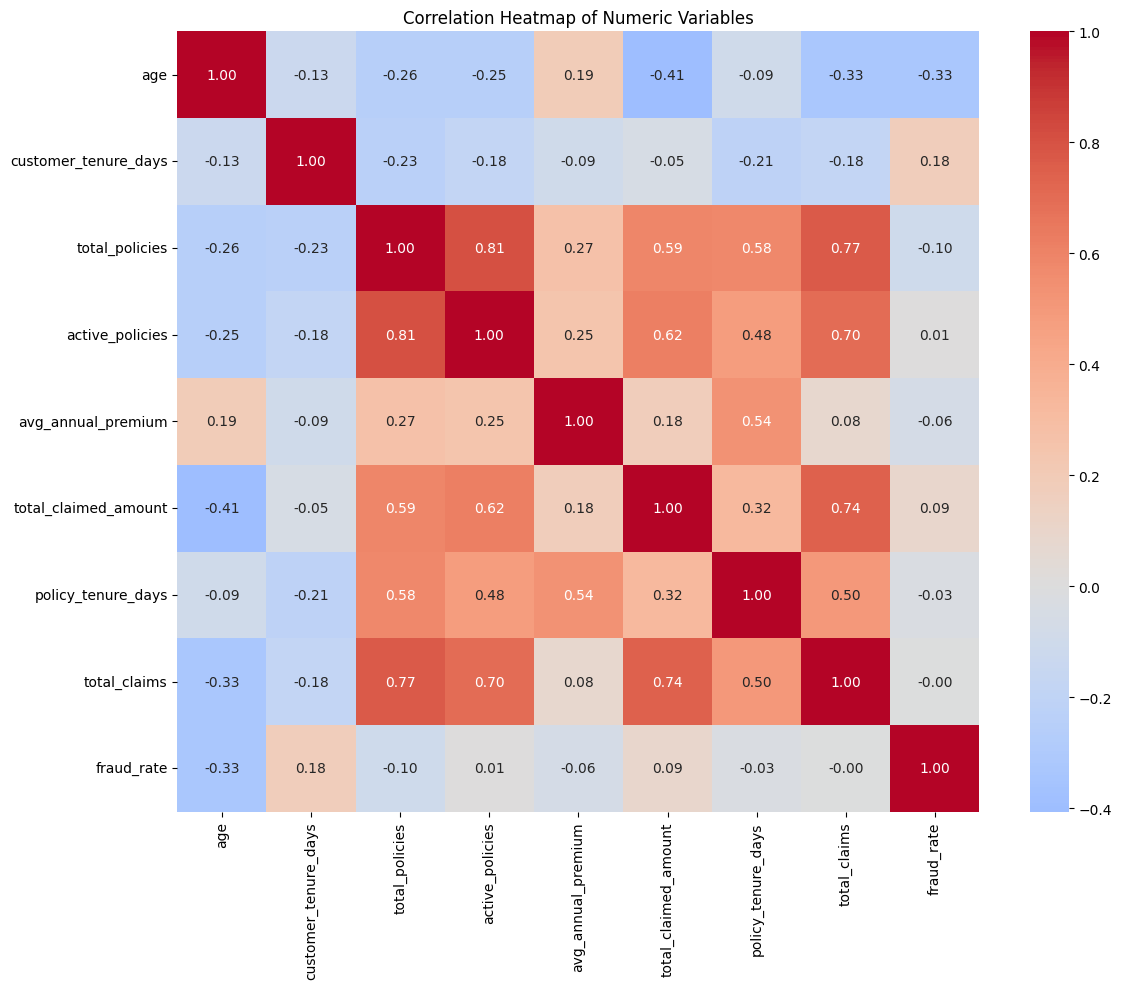

In [88]:
# Plotting numeric relationships
print("Plotting numeric relationships...")

# Select numeric columns for correlation
numeric_cols = ['age', 'customer_tenure_days', 'total_policies', 'active_policies',
               'avg_annual_premium', 'total_claimed_amount', 'policy_tenure_days',
               'total_claims', 'fraud_rate']

# Filter to only include columns that exist in the dataframe
numeric_cols = [col for col in numeric_cols if col in data.columns]

# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

## Part A
⁠For each customer compute:
•⁠ ⁠policy_tenure_days (days since first policy start)

•⁠ ⁠total_claims and total_claim_amount

•⁠ ⁠annual_premium_sum (sum of all active-policy premiums)

•⁠ ⁠fraud_claims (count of fraudulent claims detected)

In [89]:
def get_customer_metrics(df):
    """Create a DataFrame with the 4 key metrics for each customer."""
    # Create a copy of the original DataFrame to avoid modifying it
    result = df.copy()
    
    # 1. Policy tenure (already in days)
    result['policy_tenure_days'] = result['policy_tenure_days'].fillna(0)
    
    # 2. Total claims and claim amount
    result['total_claims'] = result['total_claims'].fillna(0)
    result['total_claim_amount'] = result['total_claimed_amount'].fillna(0)
    
    # 3. Annual premium sum
    result['annual_premium_sum'] = result['active_policies'] * result['avg_annual_premium']
    
    # 4. Fraud claims count
    result['fraud_claims'] = result['detection_count'].fillna(0)
    
    # Create a new DataFrame with just the customer ID and the 4 metrics
    metrics_df = result[['customer_id', 
                        'policy_tenure_days', 
                        'total_claims', 
                        'total_claim_amount',
                        'annual_premium_sum',
                        'fraud_claims']].copy()
    
    return metrics_df

# Create the metrics DataFrame
customer_metrics = get_customer_metrics(data)

# Display the first few rows
print("Customer Metrics Summary:")
display(customer_metrics.head())

# Show basic statistics
print("\nBasic Statistics:")
display(customer_metrics.describe().T)

Customer Metrics Summary:


,customer_id,policy_tenure_days,total_claims,total_claim_amount,annual_premium_sum,fraud_claims
0,1,1103.0,1.0,29430.41,4598.76,0.0
1,2,0.0,0.0,0.00,0.00,0.0
2,3,687.0,1.0,23396.02,5543.19,0.0
3,4,0.0,0.0,0.00,0.00,0.0
4,5,1252.0,3.0,43622.79,0.00,0.0



Basic Statistics:


,count,mean,std,min,25%,50%,75%,max
customer_id,50.0,25.500000,14.577380,1.0,13.25,25.500,37.75000,50.00
policy_tenure_days,50.0,899.100000,496.718138,0.0,737.50,1000.000,1246.75000,1661.00
total_claims,50.0,2.400000,2.531435,0.0,0.00,2.000,3.00000,11.00
total_claim_amount,50.0,28407.053200,46313.551287,0.0,0.00,14996.165,32377.28750,248758.88
annual_premium_sum,50.0,3085.308386,3502.853199,0.0,0.00,1909.550,4552.03375,14913.86
fraud_claims,50.0,0.060000,0.313636,0.0,0.00,0.000,0.00000,2.00


## PART B

### Calculate lifetime metrics like LTV and loss ratio using the given formulae

In [90]:
# Calculate lifetime metrics
print("Calculating lifetime metrics...")

# Create a copy to avoid SettingWithCopyWarning
lifetime_metrics = customer_metrics.copy()

# 1. Calculate Lifetime Value
lifetime_metrics['lifetime_value'] = lifetime_metrics['annual_premium_sum'] - lifetime_metrics['total_claim_amount']

# 2. Calculate Loss Ratio with division by zero handling
lifetime_metrics['loss_ratio'] = np.where(
    lifetime_metrics['annual_premium_sum'] > 0,
    lifetime_metrics['total_claim_amount'] / lifetime_metrics['annual_premium_sum'],
    np.nan  # or 0 if preferred
)

# Display results
print("\nFirst 5 customers' lifetime metrics:")
display(lifetime_metrics[['customer_id', 'lifetime_value', 'loss_ratio']].head(5))

Calculating lifetime metrics...

First 5 customers' lifetime metrics:


,customer_id,lifetime_value,loss_ratio
0,1,-24831.65,6.399640
1,2,0.00,NaN
2,3,-17852.83,4.220678
3,4,0.00,NaN
4,5,-43622.79,NaN


## Part C-
Before calculating the risk scoring algorithm, we require a few things to be in the dataframe being used.

This code creates a consolidated DataFrame with key customer metrics for risk analysis:

### Purpose
1. Combines customer data from multiple sources into a single analysis-ready dataset

2. Calculates important insurance metrics for risk assessment

### Key Metrics Added:

**Customer Identification**

customer_id: Unique identifier

**Financial Metrics**

1. loss_ratio: Claims paid vs premiums collected

2. lifetime_value: Total customer value

3. total_claim_amount: Sum of all claims

4. annual_premium_sum: Total annual premiums

**Risk Indicators**

1. fraud_claims: Count of potentially fraudulent claims

2. claim_frequency_per_year: Claims normalized by policy tenure

3. total_claims: Raw claim count

**Data Handling**

1. Fills missing fraud claims with 0

2. Handles division by zero for claim frequency

3. Converts policy tenure from days to years


In [91]:
# Create a new DataFrame with the required metrics
combined_metrics = pd.DataFrame()

# 1. Add customer identifier
combined_metrics['customer_id'] = data['customer_id']

# 2. Add loss_ratio from lifetime_metrics
if 'loss_ratio' in lifetime_metrics.columns:
    combined_metrics['loss_ratio'] = lifetime_metrics['loss_ratio']
if 'lifetime_value' in lifetime_metrics.columns:
    combined_metrics['lifetime_value'] = lifetime_metrics['lifetime_value']

# 3. Add fraud_claims from customer_analytics
if 'fraud_claims' in customer_metrics.columns:
    combined_metrics['fraud_claims'] = customer_metrics['fraud_claims'].fillna(0)  # Replace NaN with 0

# 4. Calculate claim_frequency_per_year
# First, calculate policy_tenure_years if not already present
if 'policy_tenure_days' in data.columns:
    data['policy_tenure_years'] = data['policy_tenure_days'] / 365.25
    # Calculate claims per policy per year
    combined_metrics['claim_frequency_per_year'] = data['total_claims'] / data['policy_tenure_years']
    # Handle cases where policy_tenure_years is 0 or NaN
    combined_metrics['claim_frequency_per_year'] = combined_metrics['claim_frequency_per_year'].replace([np.inf, -np.inf], np.nan)

# 5. Add any additional useful metrics
if 'total_claims' in data.columns:
    combined_metrics['total_claims'] = data['total_claims']
if 'total_claim_amount' in data.columns:
    combined_metrics['total_claim_amount'] = data['total_claim_amount']
if 'annual_premium_sum' in lifetime_metrics.columns:
    combined_metrics['annual_premium_sum'] = lifetime_metrics['annual_premium_sum']

# Display the first few rows
print("Combined Metrics DataFrame:")
display(combined_metrics.head())

# Show summary statistics
print("\nSummary Statistics:")
display(combined_metrics.describe())

Combined Metrics DataFrame:


,customer_id,loss_ratio,lifetime_value,fraud_claims,claim_frequency_per_year,total_claims,annual_premium_sum
0,1,6.399640,-24831.65,0.0,0.331142,1.0,4598.76
1,2,NaN,0.00,0.0,NaN,0.0,0.00
2,3,4.220678,-17852.83,0.0,0.531659,1.0,5543.19
3,4,NaN,0.00,0.0,NaN,0.0,0.00
4,5,NaN,-43622.79,0.0,0.875200,3.0,0.00



Summary Statistics:


,customer_id,loss_ratio,lifetime_value,fraud_claims,claim_frequency_per_year,total_claims,annual_premium_sum
count,50.00000,36.000000,50.000000,50.000000,41.000000,50.000000,50.000000
mean,25.50000,10.937978,-25321.744814,0.060000,0.984009,2.400000,3085.308386
std,14.57738,12.299057,44519.333085,0.313636,0.820977,2.531435,3502.853199
min,1.00000,0.000000,-238864.180000,0.000000,0.000000,0.000000,0.000000
25%,13.25000,2.552123,-31001.492500,0.000000,0.382461,0.000000,0.000000
50%,25.50000,5.746983,-11898.200000,0.000000,0.814079,2.000000,1909.550000
75%,37.75000,17.685230,0.000000,0.000000,1.203460,3.000000,4552.033750
max,50.00000,48.128199,6526.420000,2.000000,3.117988,11.000000,14913.860000


## Risk Score Calculation – Summary

### Purpose
Calculates an overall **risk score (0–100)** for each record in `combined_metrics` based on:
- **Loss ratio** (50% weight)
- **Fraud claims** (30% weight)
- **Claim frequency per year** (20% weight)

---

### Steps Performed

1. **Data Copy**
   - Work on a copy of the input DataFrame to avoid modifying the original.

2. **Loss Ratio Score** *(0–50 points)*
   - Cap `loss_ratio` at 100% (`1.0`) for scoring purposes.
   - Multiply normalized value by 50 to assign points.

3. **Fraud Score** *(0–30 points)*
   - Use `fraud_claims` count.
   - Cap at 5 fraud claims for scoring.
   - Normalize and multiply by 30.

4. **Frequency Score** *(0–20 points)*
   - Use `claim_frequency_per_year`.
   - Cap at 5 claims/year for scoring.
   - Normalize and multiply by 20.

5. **Total Risk Score** *(0–100)*
   - Sum all three scores.
   - Clip values to ensure they stay between 0 and 100.
   - Round to two decimal places.

6. **Risk Categories**
   - **Low Risk** → score ≤ 30  
   - **Medium Risk** → 30 < score ≤ 60  
   - **High Risk** → score > 60  

---


In [ ]:
def calculate_risk_score(combined_metrics):
    # Create a copy to avoid modifying the original
    df = combined_metrics.copy()
    
    # 1. Normalize loss_ratio (0-50 points)
    # Cap loss_ratio at 1.0 (100%) for scoring purposes
    df['loss_ratio_score'] = np.minimum(df['loss_ratio'].fillna(0), 1.0) * 50
    
    # 2. Normalize fraud_claims (0-30 points)
    # Assuming fraud_claims is a count, we'll cap it at 5 for scoring
    max_fraud_claims = 5  # Adjust based on your data
    df['fraud_score'] = (np.minimum(df['fraud_claims'], max_fraud_claims) / max_fraud_claims) * 30
    
    # 3. Normalize claim_frequency_per_year (0-20 points)
    # Cap at 5 claims per year for scoring (adjust based on your data)
    max_claims_per_year = 5
    df['frequency_score'] = (np.minimum(df['claim_frequency_per_year'].fillna(0), max_claims_per_year) / 
                            max_claims_per_year) * 20
    
    # Calculate total risk score (0-100)
    df['risk_score'] = (df['loss_ratio_score'] + 
                       df['fraud_score'] + 
                       df['frequency_score'])
    
    # Ensure score is between 0 and 100
    df['risk_score'] = np.clip(df['risk_score'], 0, 100)
    
    # Round to 2 decimal places
    df['risk_score'] = df['risk_score'].round(2)
    
    # Create risk categories
    conditions = [
        (df['risk_score'] <= 30),
        (df['risk_score'] > 30) & (df['risk_score'] <= 60),
        (df['risk_score'] > 60)
    ]
    categories = ['Low Risk', 'Medium Risk', 'High Risk']
    df['risk_category'] = np.select(conditions, categories, default='Unknown')
    
    return df
new = calculate_risk_score(combined_metrics)
new.head()

,customer_id,loss_ratio,lifetime_value,fraud_claims,claim_frequency_per_year,total_claims,annual_premium_sum,loss_ratio_score,fraud_score,frequency_score,risk_score,risk_category
0,1,6.399640,-24831.65,0.0,0.331142,1.0,4598.76,50.0,0.0,1.324569,51.32,Medium Risk
1,2,NaN,0.00,0.0,NaN,0.0,0.00,0.0,0.0,0.000000,0.00,Low Risk
2,3,4.220678,-17852.83,0.0,0.531659,1.0,5543.19,50.0,0.0,2.126638,52.13,Medium Risk
3,4,NaN,0.00,0.0,NaN,0.0,0.00,0.0,0.0,0.000000,0.00,Low Risk
4,5,NaN,-43622.79,0.0,0.875200,3.0,0.00,0.0,0.0,3.500799,3.50,Low Risk


## Assign customers to respective segments based on the LTV and risk_scores from the above dataframe

In [94]:
def assign_customer_segments(df):
    """
    Assign customers to segments based on LTV and risk score:
    1. Premium Partner (LTV ≥ 0 & risk ≤ 40)
    2. Growth Prospect (LTV ≥ 0 & 40 < risk ≤ 60)
    3. Risk Management (LTV < 0 & risk > 60)
    4. Watch List (all others)
    """
    # Create conditions for each segment
    conditions = [
        # Premium Partner
        (df['lifetime_value'] >= 0) & (df['risk_score'] <= 40),
        # Growth Prospect
        (df['lifetime_value'] >= 0) & (df['risk_score'] > 40) & (df['risk_score'] <= 60),
        # Risk Management
        (df['lifetime_value'] < 0) & (df['risk_score'] > 60),
        # Watch List (default)
        True
    ]
    
    # Define segment names
    segments = ['Premium Partner', 'Growth Prospect', 'Risk Management', 'Watch List']
    
    # Assign segments
    df['segment'] = np.select(conditions, segments, default='Unknown')
    return df
segmented = assign_customer_segments(new)
segmented.head()

,customer_id,loss_ratio,lifetime_value,fraud_claims,claim_frequency_per_year,total_claims,annual_premium_sum,loss_ratio_score,fraud_score,frequency_score,risk_score,risk_category,segment
0,1,6.399640,-24831.65,0.0,0.331142,1.0,4598.76,50.0,0.0,1.324569,51.32,Medium Risk,Watch List
1,2,NaN,0.00,0.0,NaN,0.0,0.00,0.0,0.0,0.000000,0.00,Low Risk,Premium Partner
2,3,4.220678,-17852.83,0.0,0.531659,1.0,5543.19,50.0,0.0,2.126638,52.13,Medium Risk,Watch List
3,4,NaN,0.00,0.0,NaN,0.0,0.00,0.0,0.0,0.000000,0.00,Low Risk,Premium Partner
4,5,NaN,-43622.79,0.0,0.875200,3.0,0.00,0.0,0.0,3.500799,3.50,Low Risk,Watch List


**this is a simple rule based implementation**

### using this dataframe, generate a new one with only the required columns

In [104]:
segmented[['customer_id', 'lifetime_value', 'loss_ratio', 'risk_score', 'segment']].copy().head()

,customer_id,lifetime_value,loss_ratio,risk_score,segment
0,1,-24831.65,6.399640,51.32,Watch List
1,2,0.00,NaN,0.00,Premium Partner
2,3,-17852.83,4.220678,52.13,Watch List
3,4,0.00,NaN,0.00,Premium Partner
4,5,-43622.79,NaN,3.50,Watch List


## Segment Analysis - Number of customers in each segment

In [105]:
segmented['segment'].value_counts()

segment
Watch List         30
Premium Partner    14
Risk Management     6
Name: count, dtype: int64

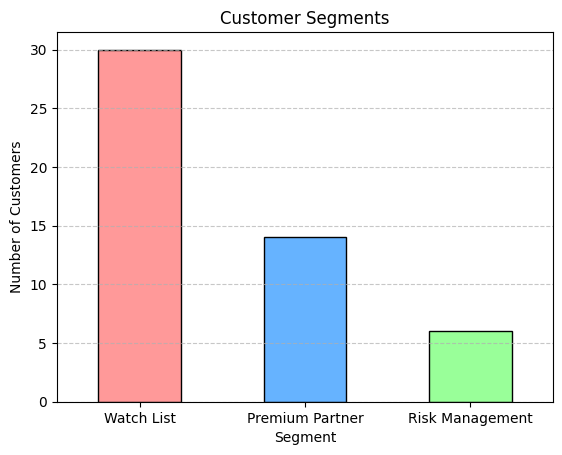

In [106]:

import matplotlib.pyplot as plt

# Count and sort segments
segment_counts = segmented['segment'].value_counts()

# Plot
segment_counts.plot(kind='bar', color=['#ff9999','#66b3ff','#99ff99'], edgecolor='black')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segments')
plt.xticks(rotation=0)  # keep labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## The final deliverable

In [107]:
final.head()

,customer_id,lifetime_value,loss_ratio,risk_score,segment
0,1,-24831.65,6.399640,51.32,Watch List
1,2,0.00,NaN,0.00,Premium Partner
2,3,-17852.83,4.220678,52.13,Watch List
3,4,0.00,NaN,0.00,Premium Partner
4,5,-43622.79,NaN,3.50,Watch List


In [109]:
final.to_csv('/Users/dev/python1_cogitate/outputs/final_output.csv', index=False)
print("File saved to: /Users/dev/python1_cogitate/outputs/final_output.csv")

File saved to: /Users/dev/python1_cogitate/outputs/final_output.csv
